# ROBAI 240 Final Project
  
### Sean Yanik, Katharyn Jia

In [1]:
#dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import seaborn as sns
%matplotlib inline

In [2]:
rstate=16

For our dataset, we chose to look at Myocardial Infarction Data  
This set contains 1700 instances on 124 parameters.   
By modeling this dataset, we hope to generate a predictor to classify patient lethality based on medical history, disease charateristics, and patient care in hospital.  

Being able to predict if a patient is at a higher risk for death can help families prepare for the worst, but can also help medical professionals make more informed decisions regarding the distribution of resources and staff. At-risk patients can be prioritized. Skilled medical professionals or complication-specified medical equipment can be readied and brought out ahead of time and predictively, rather than reactively, in respones to an incident occurring. 

Improved versions of this tech could be used not only to predict high-risk patients ahead of time, and prepare resources for them, but to help families and patients make more informed decisions around extremely expensive late-game treatments. If a patient is extremely likely to die, they might choose to forgo an extremely costly last-minute surgeries with low chances of success (which could generate great quantities of debt), and instead spend their last moments with their family. Such decisions are of course incredibly difficult to make, but a little more time with a loved one, and a chance to say goodbye, can be worth everything in the world.

In [3]:
#import raw data from local file
# This file must be present to run! (file = MI_Data.csv)
rawData = pd.read_csv("MI_Data.csv",na_values='?')
#drop if we have any duplicates. since column 0 is the unique patient identifier
rawData.drop_duplicates(inplace=True)
rawData.shape

(1700, 124)

In [4]:
rawData.describe()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
count,1700.000000,1692.000000,1700.000000,1696.000000,1594.000000,1627.000000,1649.000000,72.00000,1691.000000,1692.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,850.500000,61.856974,0.626471,0.554835,2.316186,1.205286,1.160703,0.37500,1.393258,0.033688,...,0.024706,0.041765,0.033529,0.093529,0.031765,0.044118,0.231765,0.093529,0.087059,0.477059
std,490.892045,11.259936,0.483883,0.836801,2.440586,1.040814,0.801400,0.48752,1.088803,0.180478,...,0.155273,0.200110,0.180067,0.291259,0.175425,0.205417,0.422084,0.291259,0.282004,1.381818
min,1.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,425.750000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,850.500000,63.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.00000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1275.250000,70.000000,1.000000,1.000000,5.000000,2.000000,2.000000,1.00000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1700.000000,92.000000,1.000000,3.000000,6.000000,4.000000,2.000000,1.00000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


This dataset does not have a single target row for patients that lived vs. patients that died.

Instead, it contains columns for different causes of death/complications. We will seperate those columns, and do more with them later.

In [5]:
#create a seperate Target set
target = rawData.iloc[:,112:124]
target.head()

,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
#check if there are any nulls in the target data
target.isnull().sum()

FIBR_PREDS    0
PREDS_TAH     0
JELUD_TAH     0
FIBR_JELUD    0
A_V_BLOK      0
OTEK_LANC     0
RAZRIV        0
DRESSLER      0
ZSN           0
REC_IM        0
P_IM_STEN     0
LET_IS        0
dtype: int64

Clean1 will remove unecessary columns for our data model. This includes the lethality classifications (mentioned above), as well as the patient identifier (ID) column

In [7]:
#Remove our classification columns (112-123) and remove the Patient ID column
clean1 = rawData.drop(rawData.iloc[:, 112:124], inplace = False, axis=1)
clean1.drop(['ID'], inplace=True, axis =1)
clean1.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,...,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


Clean2 will deal with missing values. We set our threshold at 50%--that is, each factor must have more than 50% of the values be non-NA, otherwise there will be too many for us to reliably use.

In [8]:
#remove columns with more than 50% missing values
clean2 = clean1.dropna(thresh=clean1.shape[0]*0.5,how='all',axis=1)
clean2.shape

(1700, 107)

In [9]:
#Find how many missing values are in each column
pd.options.display.max_rows = 108
missing_dict = dict(clean2.isna().sum())
missing_dict = {k: v for k, v in missing_dict.items() if v!=0}
missing_dict

{'AGE': 8,
 'INF_ANAM': 4,
 'STENOK_AN': 106,
 'FK_STENOK': 73,
 'IBS_POST': 51,
 'GB': 9,
 'SIM_GIPERT': 8,
 'DLIT_AG': 248,
 'ZSN_A': 54,
 'nr_11': 21,
 'nr_01': 21,
 'nr_02': 21,
 'nr_03': 21,
 'nr_04': 21,
 'nr_07': 21,
 'nr_08': 21,
 'np_01': 18,
 'np_04': 18,
 'np_05': 18,
 'np_07': 18,
 'np_08': 18,
 'np_09': 18,
 'np_10': 18,
 'endocr_01': 11,
 'endocr_02': 10,
 'endocr_03': 10,
 'zab_leg_01': 7,
 'zab_leg_02': 7,
 'zab_leg_03': 7,
 'zab_leg_04': 7,
 'zab_leg_06': 7,
 'S_AD_ORIT': 267,
 'D_AD_ORIT': 267,
 'O_L_POST': 12,
 'K_SH_POST': 15,
 'MP_TP_POST': 14,
 'SVT_POST': 12,
 'GT_POST': 12,
 'FIB_G_POST': 12,
 'ant_im': 83,
 'lat_im': 80,
 'inf_im': 80,
 'post_im': 72,
 'IM_PG_P': 1,
 'ritm_ecg_p_01': 152,
 'ritm_ecg_p_02': 152,
 'ritm_ecg_p_04': 152,
 'ritm_ecg_p_06': 152,
 'ritm_ecg_p_07': 152,
 'ritm_ecg_p_08': 152,
 'n_r_ecg_p_01': 115,
 'n_r_ecg_p_02': 115,
 'n_r_ecg_p_03': 115,
 'n_r_ecg_p_04': 115,
 'n_r_ecg_p_05': 115,
 'n_r_ecg_p_06': 115,
 'n_r_ecg_p_08': 115,
 'n_r_ec

We will create Clean3, with imputed values. We will use several rules to impute missing values 

In [10]:
clean3 = clean2.copy()
#list of real (continuous) columns from data description
ordinals = [3,4,5,6,8,10,11,44,45,46,47,91,92,93,94,99,100,101,102,103,104,123]
reals = [1,34,35,36,37,83,85,86,87,88,89,90]

In [11]:
#all other values are binary
binaries=[]
for n in range(1,124):
    if n not in ordinals and n not in reals:
        binaries.append(n)
features = list(rawData)

For real values, we will use the mean to replace missing values if the distribution appears normal, or median, if it is skewed.

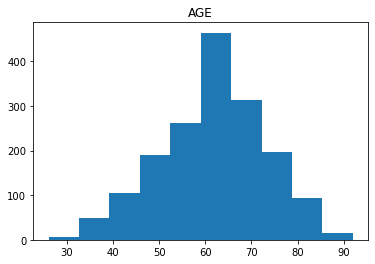

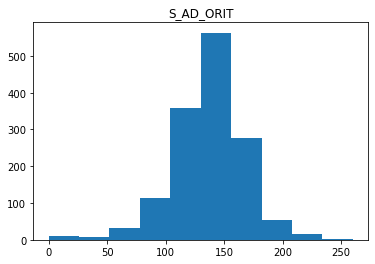

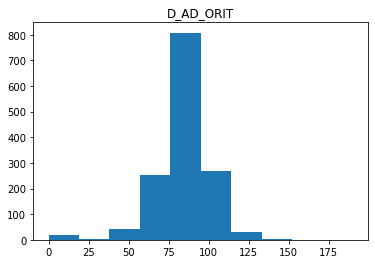

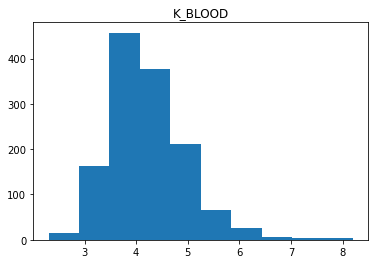

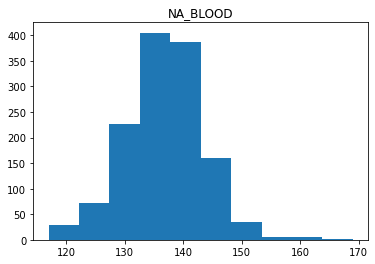

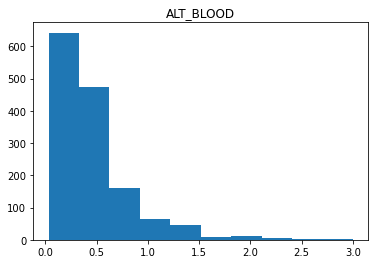

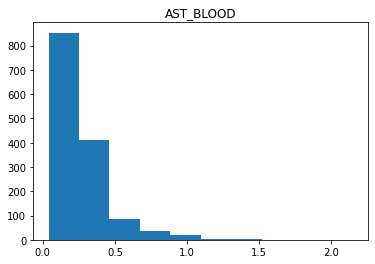

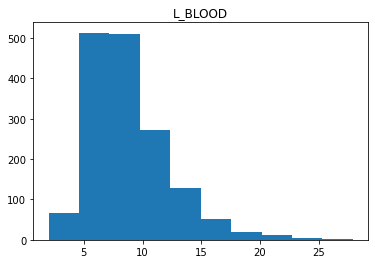

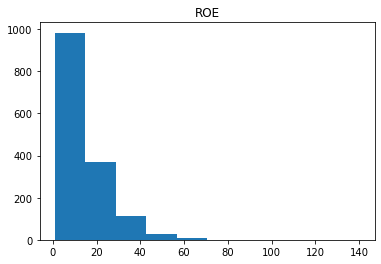

In [12]:
cleanedReals = []
for i in reals:
    if features[i] in clean3.columns:
        cleanedReals.append(i)
        plt.figure()
        plt.hist(clean3[features[i]])
        plt.title(features[i])
        plt.show()
#visually, we can seperate
normal_reals = ["AGE", "S_AD_ORIT", "D_AD_ORIT", "NA_BLOOD"]
skew_reals = ["ROE","L_BLOOD","AST_BLOOD","ALT_BLOOD", "K_BLOOD"]

for n in normal_reals:
    clean3[n] = clean3[n].fillna(clean3[n].mean())
for s in skew_reals:
    clean3[s] = clean3[s].fillna(clean3[s].median())

For binary missing values, we will use random proportional replacement, generated by sampling the data

In [13]:
def na_randomfill(series):
    na_mask = pd.isnull(series)   # boolean mask for null values
    n_null = na_mask.sum()        # number of nulls in the Series
    if n_null == 0:
        return series             # if there are no nulls, no need to resample
    # Randomly sample the non-null values from our series
    #  only sample this Series as many times as we have nulls 
    fill_values = series[~na_mask].sample(n=n_null, replace=True, random_state=rstate)
    fill_values.index = series.index[na_mask]  
    return series.fillna(fill_values) 

for i in binaries:
    if features[i] in clean3.columns:
        clean3[features[i]] = na_randomfill(clean3[features[i]])
#clean3.head(50)

Finally, for ordinal values, we will impute missing values using the most common value, or mode. This is because ordinals in our data represent different health states, therefore a median might raise false flags, for example, if a there is a bi-modal distribution in heart disease severity, for example. 

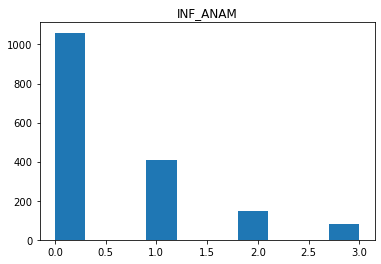

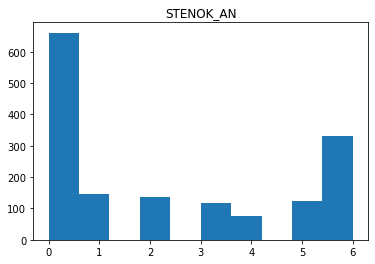

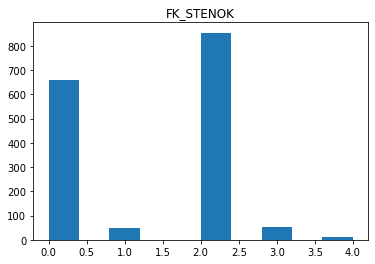

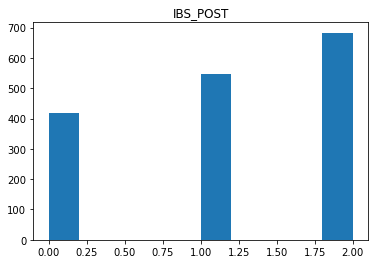

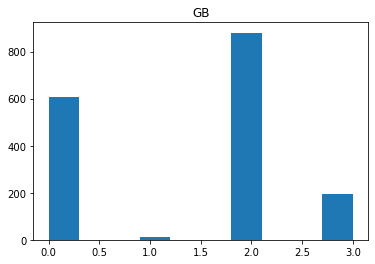

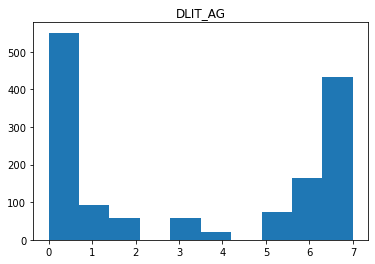

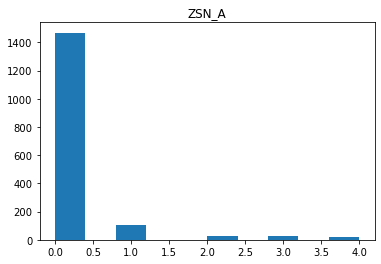

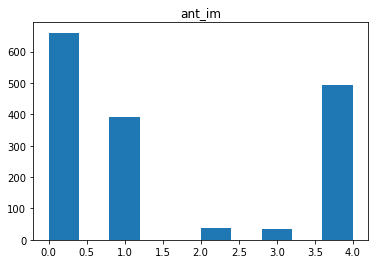

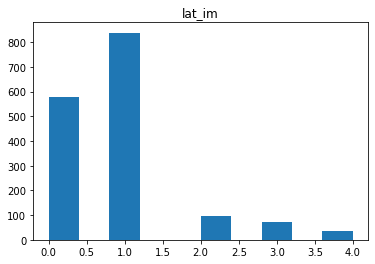

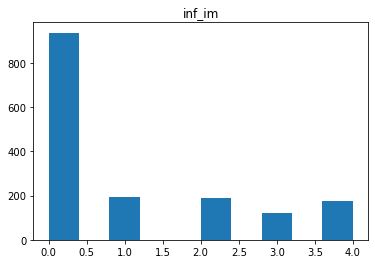

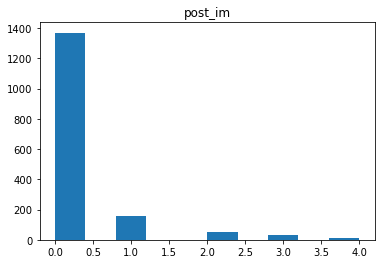

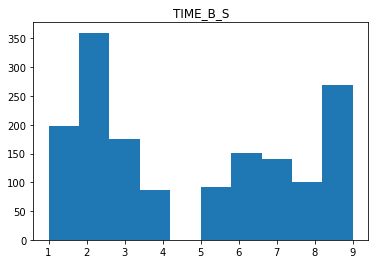

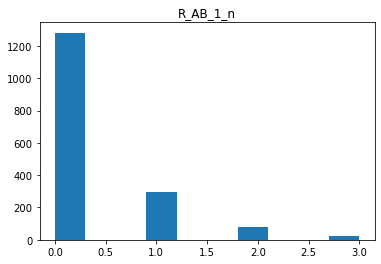

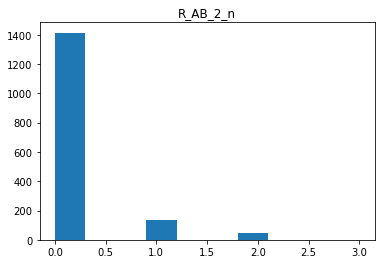

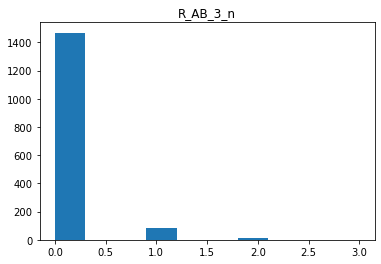

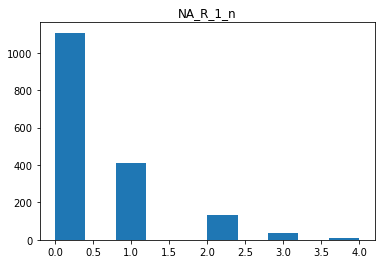

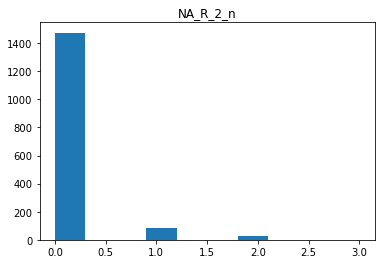

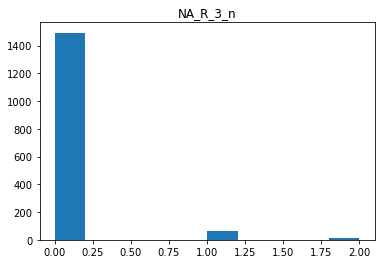

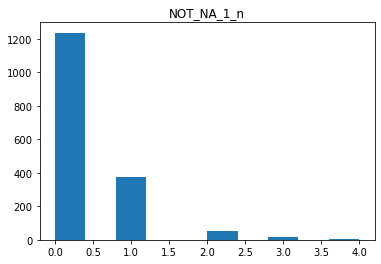

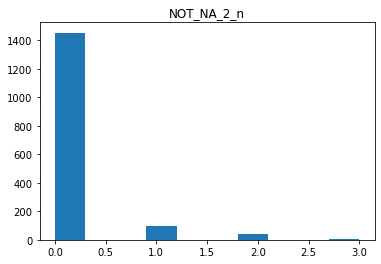

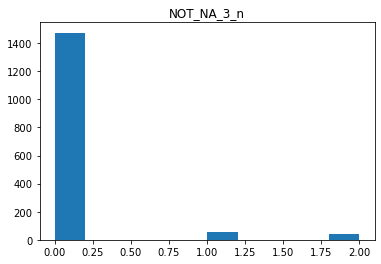

In [14]:
#the mode works well to impute unimodal ordinals, so let's first review the histograms.
for i in ordinals:
    if features[i] in clean3.columns:
        plt.figure()
        plt.hist(clean3[features[i]])
        plt.title(features[i])
        plt.show()

It llooks like all of our ordinals are unimodal, so we can proceed using the mode to fill

In [15]:
#list of ordinal values from data description
for i in ordinals:
    c = features[i]
   #print(list(clean3))
    if c in list(clean3):
        iMode = clean3[c].mode()[0]
        clean3[c].fillna(iMode,inplace=True)

In [16]:
#check for na values after filling
missing_dict = dict(clean3.isna().sum())
missing_dict = {k: v for k, v in missing_dict.items() if v!=0}
missing_dict

{}

In [17]:
clean3 

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,...,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77.0,0,0.0,4.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1696,70.0,0,0.0,6.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1697,55.0,1,3.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1698,79.0,0,2.0,2.0,2.0,1.0,2.0,0.0,7.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0


Now that the data has been cleaned up, we apply a MinMaxScaler Transform and use PCA to reduce dimensionality. We're using this instead of a Standard Scaler because keeping our data range small will greatly improve run times later on in SVC


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(clean3)
scaled_data = scaler.transform(clean3)

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA()
pca.fit(scaled_data)

PCA()

Below are some graphs relating to explained varience

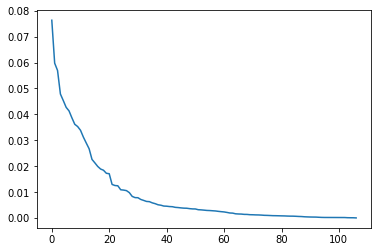

In [21]:
plt.plot(pca.explained_variance_ratio_);

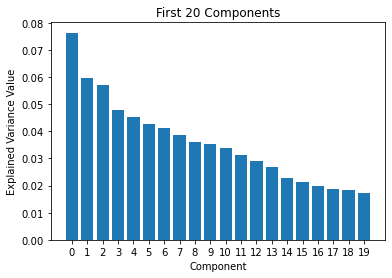

In [22]:
subset_number = 20
y = pca.explained_variance_ratio_[:subset_number]
x = range(subset_number)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel("Component")
plt.ylabel("Explained Variance Value")
plt.title("First 20 Components")
plt.bar(x,y);

Cumulative Explained Variance:

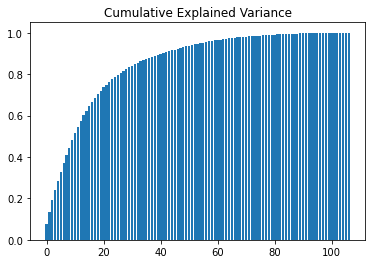

In [23]:
cumulativesums = np.cumsum(pca.explained_variance_ratio_)
plt.title("Cumulative Explained Variance")
plt.bar(range(107),cumulativesums);

It looks like significantly compressing the data will be difficult, but we will be able to shave things down somewhat.

The code below tells us what cutoff to pick if we want to maintain a certain percentage of the variance:

In [24]:
def find_pca_cutoff(desired_percentage_variance,cumsum,numb_components):
    for i in range(0,numb_components):
        value = cumsum[i]
        if value >= desired_percentage_variance:
            return i, value
    return -1, "FAILED"

In [25]:
num_components = 107
desired_percentages= [0.5,0.6,0.7,0.75,0.8,0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]

for percent in desired_percentages:
    index, real_value = find_pca_cutoff(percent,cumulativesums,num_components)
    print("If we want at least {}% variance:".format(100*percent))
    print("    Cutoff = {:-4} /{:-4} (Real Value: {:-4})".format(index,num_components,real_value))
    print()

If we want at least 50.0% variance:
    Cutoff =   10 / 107 (Real Value: 0.5143667314830134)

If we want at least 60.0% variance:
    Cutoff =   13 / 107 (Real Value: 0.6012673122672146)

If we want at least 70.0% variance:
    Cutoff =   18 / 107 (Real Value: 0.7024142870065532)

If we want at least 75.0% variance:
    Cutoff =   22 / 107 (Real Value: 0.762258220829959)

If we want at least 80.0% variance:
    Cutoff =   26 / 107 (Real Value: 0.8069378629006856)

If we want at least 85.0% variance:
    Cutoff =   32 / 107 (Real Value: 0.85470755047972)

If we want at least 90.0% variance:
    Cutoff =   41 / 107 (Real Value: 0.9023950467782412)

If we want at least 91.0% variance:
    Cutoff =   43 / 107 (Real Value: 0.9108704367738577)

If we want at least 92.0% variance:
    Cutoff =   46 / 107 (Real Value: 0.9225969129472307)

If we want at least 93.0% variance:
    Cutoff =   49 / 107 (Real Value: 0.9334862940780058)

If we want at least 94.0% variance:
    Cutoff =   51 / 107 (Re

Let's keep 55 components, and get rid of 52. That's 95% variance.

In [26]:
pca_reducer = PCA(n_components=52)
pca_reducer.fit(scaled_data)
reduced_data = pca_reducer.transform(scaled_data)
print(reduced_data.shape)

(1700, 52)


PCA compression done!

We could solve for a few different problems from this dataset. For instance, multiclass classification (what CAUSE of death / complications will a patient have), or simple lethality prediction (does a patient live or die). In this report, we perform simple lethality prediction, but we would love to do more complex predictions in the future when we do not have time and processing constraints.

For the lethality predictor, we will create a lethality target group, and map our outcomes as dead/alive

In [27]:
#first we create a new target list
death_target = target["LET_IS"]
outcomeList = list(death_target.unique())
#for lethal outcomes, 0 means alive, while 1-7 are causes of death that we will group together
def lethalMap(val):
    if val == 0:
        return 0
    return 1

death_target = death_target.apply(lethalMap)

In [28]:
death_target

0       0
1       0
2       0
3       0
4       0
       ..
1695    1
1696    1
1697    1
1698    1
1699    1
Name: LET_IS, Length: 1700, dtype: int64

Below, the data is split into 2 Groups:

80%   Training

20% Testing

These splits make up a simple lethality (leth) prediction set. (X_train_leth, X_test_leth, ...)

In [29]:
from sklearn.model_selection import train_test_split

#Split the Pure Lethality Set
# stratify = death_target
X_train_leth, X_test_leth, y_train_leth, y_test_leth = train_test_split(reduced_data,death_target, 
                                                                        random_state=rstate,stratify=death_target,
                                                                       test_size=0.2)

Let's quickly check that the data is properly split:

In [30]:
for split in [X_train_leth, X_test_leth, y_train_leth, y_test_leth]:
    print(split.shape)

(1360, 52)
(340, 52)
(1360,)
(340,)


This is correct.

In [31]:
X_train_leth

array([[ 1.63803088e-01,  1.03422117e+00, -4.44315857e-01, ...,
         3.91875334e-02, -1.07620243e-01, -1.31037079e-01],
       [ 6.27194681e-01, -3.80392216e-01, -1.29901040e+00, ...,
        -3.30016291e-04,  9.16341690e-03, -5.17106076e-02],
       [ 6.22576805e-01, -1.16557768e+00,  5.04032706e-02, ...,
         7.32523761e-04,  1.92527172e-02, -4.96301399e-02],
       ...,
       [-4.93070968e-01, -2.48638152e-01,  5.44585088e-01, ...,
         4.26504764e-02,  7.69327001e-02, -1.96003357e-02],
       [ 1.00908863e+00, -8.20247405e-02, -3.77373087e-01, ...,
        -1.32676759e-01, -1.26977652e-01, -8.61375981e-02],
       [-2.55198027e-01, -5.86699550e-01,  4.93144663e-02, ...,
        -6.84820357e-02,  2.93590431e-01,  2.46602805e-01]])

In [32]:
y_train_leth

50      0
1055    0
1099    0
138     0
537     0
       ..
1427    1
724     0
405     0
387     0
34      0
Name: LET_IS, Length: 1360, dtype: int64

That looks correct.

Now that our data is split, we can begin using K-Fold Cross Validation and a Grid Search to try out different models for effectivity.

For this binary classification problem, we'll be comparing:

KNN

Logistic Regression

Kernal SVM (Liner, and rbf)

Naive Bayes

Random Forest

Gradient Boosted Trees!

First, we must decide how many folds to use in our K-Fold Cross Validation.

Let's use 4 to maintain a good amount of variance in each testing fold.

In [33]:
n_folds = 4
#we will store our best models here:
best_models = {
    "K-Nearest Neighbors":None,
    "Logistic Regression":None,
    "Kernal Support Vector Machine":None,
    "Gaussian Naive Bayes":None,
    "Random Forest":None,
    "Gradient Boosted Trees":None
}

from sklearn.model_selection import GridSearchCV

NOTE! Several of these models, particularly the Kernal SVM, take very long to train. If you are running this code yourself, you will either have to wait a long time, or simplify the parameter grids.

GridCV for KNNs:

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
parameters = {
    'p':[1,1.25,1.5,1.75,2],
    'n_neighbors':[1,4,5,6],
}

cv_neighbors = GridSearchCV(knn,parameters,cv=n_folds)
cv_neighbors.fit(X_train_leth,y_train_leth)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 4, 5, 6],
                         'p': [1, 1.25, 1.5, 1.75, 2]})

We are searching for the best combination of p and k.
P is the distance metric. When it is equal to 1, we use the Manhattan distance to calculate distance between points (L1)
When it is equal to 2, we use the Euclidean distance (L2). For all other values, we would use the Minkowski distance.

The number of neighbors is the number of points against which the data is matched--lower results in specificity, but runs the risk of overfitting to peculiarities of the training data. At higher values, we risk underfitting, since the many points can blur distinct features of the data. 

In [35]:
best_models["K-Nearest Neighbors"]=cv_neighbors.best_estimator_
print(cv_neighbors.best_estimator_)

KNeighborsClassifier(p=1)


GridCV for Logistic Regression:

In [36]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=rstate, max_iter = 10000)
parameters = { 'penalty' : ['l1', 'l2'],
            'C' : np.logspace(-6, 6, 20),
            'solver' : ['saga']}

cv_logistc = GridSearchCV(lr, parameters,cv=n_folds)
cv_logistc.fit(X_train_leth,y_train_leth)

GridSearchCV(cv=4,
             estimator=LogisticRegression(max_iter=10000, random_state=16),
             param_grid={'C': array([1.00000000e-06, 4.28133240e-06, 1.83298071e-05, 7.84759970e-05,
       3.35981829e-04, 1.43844989e-03, 6.15848211e-03, 2.63665090e-02,
       1.12883789e-01, 4.83293024e-01, 2.06913808e+00, 8.85866790e+00,
       3.79269019e+01, 1.62377674e+02, 6.95192796e+02, 2.97635144e+03,
       1.27427499e+04, 5.45559478e+04, 2.33572147e+05, 1.00000000e+06]),
                         'penalty': ['l1', 'l2'], 'solver': ['saga']})

For a Logistic regression, we are working through the following parameters:
    Penalty: this determines which normalization we use, L1 or L2
    C: this is the (inverse) of the regularization term. At higher values, the data less regularized, and therefore runs the risk of overfitting. At lower values, there is more regularization and the coefficients are either pushed toward zero or minimized (L1 versus L2). L1 would help prune any excessive components left over after our PCA.
    Solver: saga is faster for larger datasets.

In [37]:
best_models["Logistic Regression"]=cv_logistc.best_estimator_

GridCV for Kernel SVM:

In [38]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
bsvc = BaggingClassifier(base_estimator = SVC(random_state=rstate), 
                         bootstrap= False, 
                         n_jobs=-1, random_state=rstate)#-1 = use all processors
#use bagging to run in parallel to reduce runtimes
param_grid = {
 'bootstrap': [False], #resampling without replacements, so results should be the comparable
 'base_estimator__kernel': ['linear', 'rbf'], # __ denotes svc parameters   
 'base_estimator__C': np.logspace(-4, 4, 6),
}


cv_svc = GridSearchCV(bsvc,param_grid, verbose=3, cv=[(slice(None), slice(None))])
# cross validation disabled
cv_svc.fit(X_train_leth, y_train_leth)

Fitting 1 folds for each of 12 candidates, totalling 12 fits
[CV] base_estimator__C=0.0001, base_estimator__kernel=linear, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  base_estimator__C=0.0001, base_estimator__kernel=linear, bootstrap=False, score=0.840, total=   2.3s
[CV] base_estimator__C=0.0001, base_estimator__kernel=rbf, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV]  base_estimator__C=0.0001, base_estimator__kernel=rbf, bootstrap=False, score=0.840, total=   0.2s
[CV] base_estimator__C=0.003981071705534973, base_estimator__kernel=linear, bootstrap=False 
[CV]  base_estimator__C=0.003981071705534973, base_estimator__kernel=linear, bootstrap=False, score=0.840, total=   0.2s

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s



[CV] base_estimator__C=0.003981071705534973, base_estimator__kernel=rbf, bootstrap=False 
[CV]  base_estimator__C=0.003981071705534973, base_estimator__kernel=rbf, bootstrap=False, score=0.840, total=   0.3s
[CV] base_estimator__C=0.15848931924611143, base_estimator__kernel=linear, bootstrap=False 
[CV]  base_estimator__C=0.15848931924611143, base_estimator__kernel=linear, bootstrap=False, score=0.874, total=   0.2s
[CV] base_estimator__C=0.15848931924611143, base_estimator__kernel=rbf, bootstrap=False 
[CV]  base_estimator__C=0.15848931924611143, base_estimator__kernel=rbf, bootstrap=False, score=0.840, total=   0.4s
[CV] base_estimator__C=6.309573444801943, base_estimator__kernel=linear, bootstrap=False 
[CV]  base_estimator__C=6.309573444801943, base_estimator__kernel=linear, bootstrap=False, score=0.891, total=   0.5s
[CV] base_estimator__C=6.309573444801943, base_estimator__kernel=rbf, bootstrap=False 
[CV]  base_estimator__C=6.309573444801943, base_estimator__kernel=rbf, bootstr

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  6.8min finished


GridSearchCV(cv=[(slice(None, None, None), slice(None, None, None))],
             estimator=BaggingClassifier(base_estimator=SVC(random_state=16),
                                         bootstrap=False, n_jobs=-1,
                                         random_state=16),
             param_grid={'base_estimator__C': array([1.00000000e-04, 3.98107171e-03, 1.58489319e-01, 6.30957344e+00,
       2.51188643e+02, 1.00000000e+04]),
                         'base_estimator__kernel': ['linear', 'rbf'],
                         'bootstrap': [False]},
             verbose=3)

SVC has > quadratic complexity, so in order to speed up run times, we've nested the SVC inside the bagging classifier to allow more calulations in parallel.
For SVC, we have tuned our model along parameter C, which functions the same way as the Logistic Regressor regulariztion inverse term did.
We are also testing different kernels, which represent different data transformations to achieve optimal seperation. Due to the structure of PCA component vectors (as opposed to natural features), we tested just rbf and linear parameters. 

In [39]:
best_models["Kernal Support Vector Machine"]=cv_svc.best_estimator_

GridCV for Naive Bayes:

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold

gaus = GaussianNB()
parameters = {
    'var_smoothing':np.logspace(-15, 2, 30)
}

cv_gaus = GridSearchCV(gaus,parameters,cv = RepeatedStratifiedKFold(n_splits=4,  n_repeats=4, random_state=rstate))
cv_gaus.fit(X_train_leth,y_train_leth)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=4, n_splits=4, random_state=16),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e-15, 3.85662042e-15, 1.48735211e-14, 5.73615251e-14,
       2.21221629e-13, 8.53167852e-13, 3.29034456e-12, 1.26896100e-11,
       4.89390092e-11, 1.88739182e-10, 7.27895384e-10, 2.80721620e-09,
       1.08263673e-08, 4.17531894e-08, 1.61026203e-07, 6.21016942e-07,
       2.39502662e-06, 9.23670857e-06, 3.56224789e-05, 1.37382380e-04,
       5.29831691e-04, 2.04335972e-03, 7.88046282e-03, 3.03919538e-02,
       1.17210230e-01, 4.52035366e-01, 1.74332882e+00, 6.72335754e+00,
       2.59294380e+01, 1.00000000e+02])})

In [41]:
best_models["Gaussian Naive Bayes"]=cv_gaus.best_estimator_

For Naive Bayes, we used a repeated stratified fold in order to retain the distribution of the original data in the subsequent splits. This is because NB is dependent on the proportions.

GridCV for Random Forest:

In [42]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=rstate)
parameters = {
    'n_estimators':[10,50,100],
    'max_depth':[4,None],
    'min_samples_split':[2,8],
    'max_leaf_nodes':[16,None],
    'max_features': ["auto", None]
}

cv_forest = GridSearchCV(forest,parameters,cv=n_folds)
cv_forest.fit(X_train_leth,y_train_leth)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=16),
             param_grid={'max_depth': [4, None], 'max_features': ['auto', None],
                         'max_leaf_nodes': [16, None],
                         'min_samples_split': [2, 8],
                         'n_estimators': [10, 50, 100]})

In [43]:
best_models["Random Forest"]=cv_forest.best_estimator_

We can actually test our optimal random forest for accuracy by looking at the relative variable weights. From the structure of PCA, we know that each component is ordered in decreasing variance explained, so ideally, our random forest might vaguely reflect this, and resemble our percent variance PCA plot. Of course, a component having high variance does not guarantee that it will be useful in predictions, so this is not any exact science.

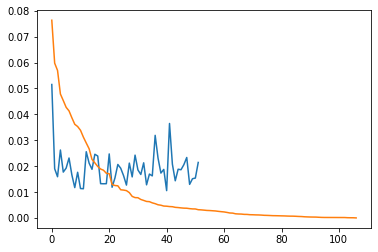

In [44]:
plt.plot(cv_forest.best_estimator_.feature_importances_)#blue
plt.plot(pca.explained_variance_ratio_); #orange

GridCV for Gradient Boosted Trees:

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

boost = GradientBoostingClassifier(random_state=rstate)
parameters = {
    'n_estimators' : [1, 2, 4, 8, 16, 32, 64, 100, 200],
    'learning_rate': [2, 1, 0.5, 0.25, 0.1, 0.05, 0.01,.001],
}

cv_boost = GridSearchCV(boost,parameters,cv=n_folds,verbose=0,n_jobs=1) #n_jobs = -1 means use all processors
cv_boost.fit(X_train_leth,y_train_leth)

GridSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=16),
             n_jobs=1,
             param_grid={'learning_rate': [2, 1, 0.5, 0.25, 0.1, 0.05, 0.01,
                                           0.001],
                         'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200]})

In [46]:
best_models["Gradient Boosted Trees"]=cv_boost.best_estimator_

In [47]:
for title, model in best_models.items():
    print(title)
    print("    ", model)

K-Nearest Neighbors
     KNeighborsClassifier(p=1)
Logistic Regression
     LogisticRegression(C=2.06913808111479, max_iter=10000, random_state=16,
                   solver='saga')
Kernal Support Vector Machine
     BaggingClassifier(base_estimator=SVC(C=251.18864315095823, random_state=16),
                  bootstrap=False, n_jobs=-1, random_state=16)
Gaussian Naive Bayes
     GaussianNB(var_smoothing=0.11721022975334745)
Random Forest
     RandomForestClassifier(n_estimators=50, random_state=16)
Gradient Boosted Trees
     GradientBoostingClassifier(learning_rate=0.05, random_state=16)


We have now evaluated all of our desired model types using GridSearchCV.
Now, let's assess the best performing model from each grid search

In [48]:
from time import time
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.metrics import plot_confusion_matrix
def assess_model(title,model,x,y):
    print("Assessing {}:".format(title))
    start = time()
    predictions = model.predict(x)
    end = time()
    
    conf_matrix = confusion_matrix(y,predictions)
    accuracy = round(accuracy_score(y,predictions),4)
    recall = round(recall_score(y,predictions),4)
    precision = round(precision_score(y,predictions),4)
    duration = round((end - start)*1000,3)
    
    print("    Accuracy : {:-8}".format(accuracy))
    print("    Recall : {:-10}".format(recall))
    print("    Precision : {:-7}".format(precision))
    print("    Time : {:-11}ms".format(duration))
    
    trueNeg, falsePos, falseNeg, truePos = conf_matrix.ravel()
# Plot non-normalized and normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(model, x, y,
                                     #display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)
        print(title)
        print(disp.confusion_matrix)
    plt.show()
    print("\tTrue Negative: ",trueNeg,"\n\tFalse Positive: ", falsePos,
          "\n\tFalse Negative: ",falseNeg,"\n\tTrue Positive: ", truePos)
    print()


Assessing K-Nearest Neighbors:
    Accuracy :     0.85
    Recall :     0.1296
    Precision :  0.6364
    Time :      55.847ms
Confusion matrix, without normalization
[[282   4]
 [ 47   7]]
Normalized confusion matrix
[[0.98601399 0.01398601]
 [0.87037037 0.12962963]]


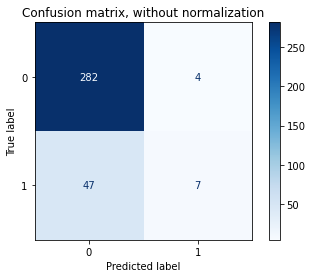

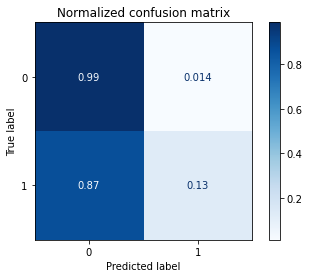

	True Negative:  282 
	False Positive:  4 
	False Negative:  47 
	True Positive:  7

Assessing Logistic Regression:
    Accuracy :   0.8765
    Recall :     0.4444
    Precision :  0.6667
    Time :       0.985ms
Confusion matrix, without normalization
[[274  12]
 [ 30  24]]
Normalized confusion matrix
[[0.95804196 0.04195804]
 [0.55555556 0.44444444]]


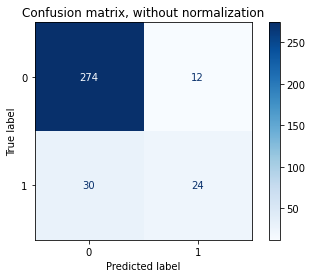

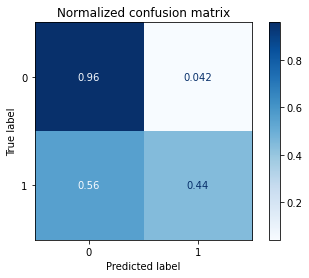

	True Negative:  274 
	False Positive:  12 
	False Negative:  30 
	True Positive:  24

Assessing Kernal Support Vector Machine:
    Accuracy :   0.8588
    Recall :      0.463
    Precision :  0.5682
    Time :    2463.416ms
Confusion matrix, without normalization
[[267  19]
 [ 29  25]]
Normalized confusion matrix
[[0.93356643 0.06643357]
 [0.53703704 0.46296296]]


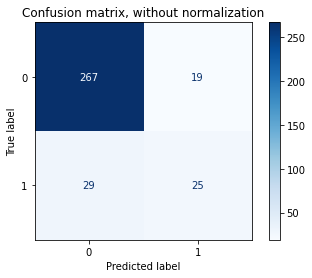

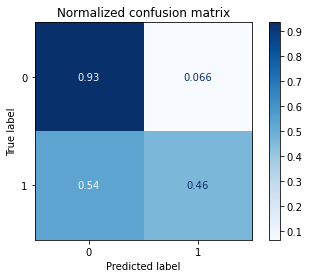

	True Negative:  267 
	False Positive:  19 
	False Negative:  29 
	True Positive:  25

Assessing Gaussian Naive Bayes:
    Accuracy :   0.8529
    Recall :     0.1296
    Precision :     0.7
    Time :       1.944ms
Confusion matrix, without normalization
[[283   3]
 [ 47   7]]
Normalized confusion matrix
[[0.98951049 0.01048951]
 [0.87037037 0.12962963]]


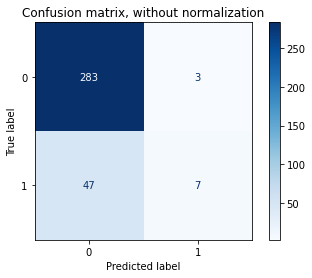

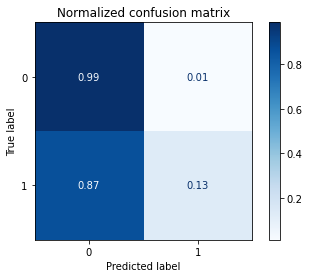

	True Negative:  283 
	False Positive:  3 
	False Negative:  47 
	True Positive:  7

Assessing Random Forest:
    Accuracy :   0.8559
    Recall :     0.1667
    Precision :  0.6923
    Time :       9.966ms
Confusion matrix, without normalization
[[282   4]
 [ 45   9]]
Normalized confusion matrix
[[0.98601399 0.01398601]
 [0.83333333 0.16666667]]


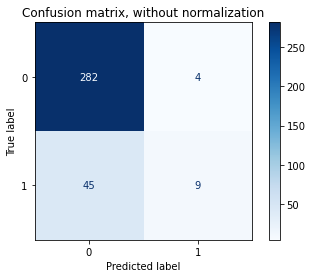

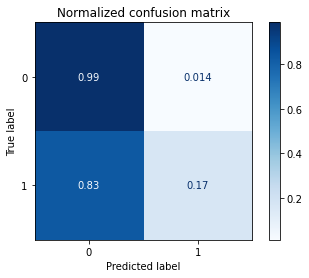

	True Negative:  282 
	False Positive:  4 
	False Negative:  45 
	True Positive:  9

Assessing Gradient Boosted Trees:
    Accuracy :   0.8559
    Recall :     0.1852
    Precision :  0.6667
    Time :       2.989ms
Confusion matrix, without normalization
[[281   5]
 [ 44  10]]
Normalized confusion matrix
[[0.98251748 0.01748252]
 [0.81481481 0.18518519]]


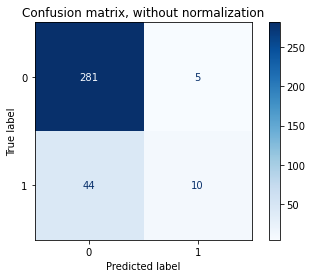

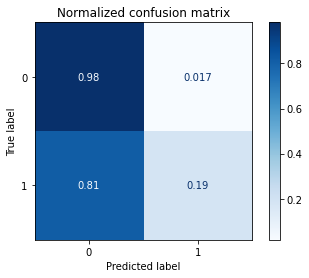

	True Negative:  281 
	False Positive:  5 
	False Negative:  44 
	True Positive:  10



In [49]:
for title, model in best_models.items():
    assess_model(title,model,X_test_leth,y_test_leth)

Analysis:

For this, as in most medical data sets, the implications of a false positive involve falsely identifying a patient as doomed to pass away. This has consequences not only for the mental health of the patient, but also on the urgency of care provided by the medical professionals. Therefore, it is extremely worthwhile to minimize false positives.

Contrarily, the implications of a false negative involve assuming a patient will be alright, when they in fact are about to die. This has dire consequences for the physical health of the patient. Therefore, it is extremely worthwhile to minimize false negatives.

What we are looking for, then, is the model that does the best overall.

All Models, ranked are:

By Precision:

1. Gaussian Naive Bayes 0.7

2. Random Forest 0.69

3. Logistic Regression 0.66 (TIE)

3. Gradient Boosted Trees 0.66 (TIE)

5. K-Nearest Neighbors 0.63

6. Kernel Support Vector Machine 0.56



By Recall:

1. Kernel Support Vector Machine 0.46

2. Logistic Regression 0.44

3. Gradient Boosted Trees 0.1852

4. Random Forest 0.16

5. Gaussian Naive Bayes 0.12 (TIE)

5. K-Nearest Neighbors 0.12 (TIE)



By Accuracy:

1. Logistic Regression 0.87

2. Kernel Support Vector Machine 0.858

3. Random Forest 0.855 (TIE)

3. Gradient Boosted Trees 0.855 (TIE)

5. Gaussian Naive Bayes 0.852

6. K-Nearest Neighbors 0.85


By Prediction time:

1. Logistic Regression 0.985ms

2. Gaussian Naive Bayes 1.944ms

3. Gradient Boosted Trees 2.989ms

4. Random Forest  9.966ms

5. K-Nearest Neighbors 55.847ms

6. Kernel Support Vector Machine 2463.416ms


Logistic Regression is the best overall model, coming in 1st for accuracy, 2nd for recall, and third for precision. 

Naive Bayes is the best model for precision, 0.01 points ahead of random forest, and 0.04 points ahead of logistic regression and gradient boosted trees. If precision was desired above all else, Naive Bayes would be the best choice.

Kernal SVM had excellent recall, but the worst precision. If recall was valued over precision (for instance, if there are only a few patients, and it was desired to know if any patient was in great danger of death), kernal SVM would be a good choice.

Overall, I think logistic regression is the best choice due to its generally high stats, but use of a combination of models could be beneficial (either seperate, and then compared, or as an ensemble). 

For some more analysis, see the written report.

Thank you for reading our final project file.